<a href="https://colab.research.google.com/github/GutemaB2015/Gutema-thesis/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#list of imported libraries.
import pandas as pd
import numpy as np
import time
import random
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

# DatasetUrl
DatasetUrl = 'https://raw.githubusercontent.com/GutemaB2015/Gutema-thesis/main/FillDataset.csv'
data = pd.read_csv(DatasetUrl)



# Extraxt the features you want to base the foundation of our model training
features = ['Max_Packet_Length','Fwd_Packet_Length_Max','Flow_Packets_Sec','Flow_Bytes_Sec','Packet_Length_Std','Packet_Length_Variance','Flow_IAT_Max'
           ,'Fwd_IAT_Max','Subflow_Fwd_Bytes','Fwd_Packet_Length_Std','Bwd_Packets_Sec','min_seg_size_forward','Init_Win_bytes_backward','Average_Packet_Size'
           ,'Packet_Length_Mean','Fwd_IAT_Total','Flow_IAT_Std','Fwd_IAT_Std','Avg_Fwd_Segment_Size','Fwd_Packet_Length_Mean','Fwd_Header_Length'
           ,'Fwd_IAT_Mean','Flow_IAT_Mean','Idle_Max','Idle_Mean','Fwd_Packets_Sec','Active_Std','Active_Max','Active_Min']


label_encoder = preprocessing.LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])
data['Label'].fillna(data['Label'].median(), inplace=True)
AttackLabel = data["Label"]

data = data.drop("Total_Length_of_Bwd_Packets", axis=1)
data = data.drop("Fwd_Packet_Length_Min", axis=1)
data = data.drop("Bwd_Packet_Length_Max", axis=1)
data = data.drop("Bwd_Packet_Length_Min", axis=1)
data = data.drop("Bwd_Packet_Length_Mean", axis=1)
data = data.drop("Bwd_Packet_Length_Std", axis=1)
data = data.drop("Flow_IAT_Min", axis=1)
data = data.drop("Fwd_IAT_Min", axis=1)

data = data.drop("Bwd_IAT_Total", axis=1)
data = data.drop("Bwd_IAT_Mean", axis=1)
data = data.drop("Bwd_IAT_Std", axis=1)
data = data.drop("Bwd_IAT_Max", axis=1)
data = data.drop("Bwd_IAT_Min", axis=1)
data = data.drop("Bwd_Header_Length", axis=1)
data = data.drop("Min_Packet_Length", axis=1)
data = data.drop("SYN_Flag_Count", axis=1)
data = data.drop("Down_Up_Ratio", axis=1)
data = data.drop("Avg_Bwd_Segment_Size", axis=1)
data = data.drop("Subflow_Fwd_Packets", axis=1)
data = data.drop("Subflow_Bwd_Packets", axis=1)
data = data.drop("Subflow_Bwd_Bytes", axis=1)
data = data.drop("Init_Win_bytes_forward", axis=1)
data = data.drop("act_data_pkt_fwd", axis=1)
data = data.drop("Active_Mean", axis=1)
data = data.drop("Idle_Std", axis=1)
data = data.drop("Idle_Min", axis=1)



# Replace missing values with the mean of the column
data['Fwd_Packets_Sec'].fillna(data['Fwd_Packets_Sec'].median(), inplace=True)
data['Idle_Mean'].fillna(data['Idle_Mean'].median(), inplace=True)
data['Idle_Max'].fillna(data['Idle_Max'].median(), inplace=True)
data['Flow_IAT_Mean'].fillna(data['Flow_IAT_Mean'].median(), inplace=True)
data['Active_Std'].fillna(data['Active_Std'].median(), inplace=True)
data['Active_Max'].fillna(data['Active_Max'].median(), inplace=True)
data['Active_Min'].fillna(data['Active_Min'].median(), inplace=True)
data['Fwd_IAT_Mean'].fillna(data['Fwd_IAT_Mean'].median(), inplace=True)
data['Fwd_Header_Length'].fillna(data['Fwd_Header_Length'].median(), inplace=True)
data['Fwd_Packet_Length_Mean'].fillna(data['Fwd_Packet_Length_Mean'].median(), inplace=True)
data['Avg_Fwd_Segment_Size'].fillna(data['Avg_Fwd_Segment_Size'].median(), inplace=True)

data['Fwd_IAT_Std'].fillna(data['Fwd_IAT_Std'].median(), inplace=True)
data['Fwd_IAT_Total'].fillna(data['Fwd_IAT_Total'].median(), inplace=True)
data['Flow_IAT_Std'].fillna(data['Flow_IAT_Std'].median(), inplace=True)
data['Packet_Length_Mean'].fillna(data['Packet_Length_Mean'].median(), inplace=True)
data['Average_Packet_Size'].fillna(data['Average_Packet_Size'].median(), inplace=True)
data['Init_Win_bytes_backward'].fillna(data['Init_Win_bytes_backward'].median(), inplace=True)
data['min_seg_size_forward'].fillna(data['min_seg_size_forward'].median(), inplace=True)
data['Bwd_Packets_Sec'].fillna(data['Bwd_Packets_Sec'].median(), inplace=True)

data['Fwd_Packet_Length_Std'].fillna(data['Fwd_Packet_Length_Std'].median(), inplace=True)
data['Subflow_Fwd_Bytes'].fillna(data['Subflow_Fwd_Bytes'].median(), inplace=True)
data['Fwd_IAT_Max'].fillna(data['Fwd_IAT_Max'].median(), inplace=True)
data['Flow_IAT_Max'].fillna(data['Flow_IAT_Max'].median(), inplace=True)
data['Packet_Length_Variance'].fillna(data['Packet_Length_Variance'].median(), inplace=True)
data['Packet_Length_Std'].fillna(data['Packet_Length_Std'].median(), inplace=True)
data['Flow_Bytes_Sec'].fillna(data['Flow_Bytes_Sec'].median(), inplace=True)
data['Flow_Packets_Sec'].fillna(data['Flow_Packets_Sec'].median(), inplace=True)
data['Fwd_Packet_Length_Max'].fillna(data['Fwd_Packet_Length_Max'].median(), inplace=True)
data['Max_Packet_Length'].fillna(data['Max_Packet_Length'].median(), inplace=True)



# Get descriptive statistics of the dataset
print(data.describe())

# Check for missing values
print("Number of missing values under each column \n",data.isnull().sum())

# Describe the missing values. at the contrary since our dataframe is full and there are no
# missing values.hence, it displays 0.
for column in data.columns:
    if data[column].isnull().any():
        print("Column name:", column)
        print("Number of missing values:", data[column].isnull().sum())
        print("Percentage of missing values:", (data[column].isnull().sum() / len(data)) * 100)


# Print the data types of the columns
print("Data types:", data.dtypes)
# Print the summary statistics of the columns
print("Summary statistics:", data.describe())
# Print the number of missing values
print("Number of missing values:", data.isnull().sum())
# Print the unique values in each column
for column in data.columns:
    print("Unique values in column", column, ":", len(data[column].unique()))
# Print the correlation matrix
print("Correlation matrix:", data.corr())



# [ here below is the describtion of above code ]
# This code will first import the necessary libraries, then create a dataset.
# Next, it will use the describe() method of the pandas DataFrame class to get descriptive statistics of the dataset.
# The describe() method returns a table that shows the count, mean, standard deviation, minimum value,
# 25th percentile, 50th percentile (median), 75th percentile, and maximum value for each column in the dataset.

# The descriptive statistics of a dataset can be used to understand the distribution of the data and identify any outliers.
# Outliers are data points that are significantly different from the rest of the data.
# Outliers can sometimes be caused by errors in data collection or processing.
# Split the dataset into training and test sets






X_train, X_test, y_train, y_test = train_test_split(data[features], AttackLabel, test_size=0.2, random_state=1)


#DEscision Tree Accuracy
dectreClassifier = DecisionTreeClassifier(criterion="entropy",min_samples_split=2,max_depth=2,min_samples_leaf=5)
dectreClassifier = dectreClassifier.fit(X_train,y_train)
y_pred = dectreClassifier.predict(X_test)
print("Decision Tree Classiffier Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Print extracted metrics
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1_score)


# Create a logistic regression model
rmfClassifier = RandomForestClassifier(n_estimators=20, max_depth=2, min_samples_split=20, max_features=10)
rmfClassifier.fit(X_train, y_train)
y_pred = rmfClassifier.predict(X_test)
rmfClassifieraccuracy = rmfClassifier.score(X_test, y_test)
print('Random Forest Classifier Accuracy:', rmfClassifieraccuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)


precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Print extracted metrics
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1_score)


# create gaussian naive bayes classifier
naiveBayes = GaussianNB()
naiveBayes.fit(X_train,y_train)
naiveBayesPreddiction = naiveBayes.predict(X_test)
print("Naive Bayes's  Algorithm Accuracy: ",metrics.accuracy_score(y_test,naiveBayesPreddiction))
print(classification_report(y_test, y_pred))

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Print extracted metrics
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1_score)


#K-Nearest Neighbour Algorithm
knClassifier = KNeighborsClassifier(n_neighbors=5)
knClassifier.fit(X_train, y_train)
predictions = knClassifier.predict(X_test)
print('K-Nearest Neighbour Accuracy:', knClassifier.score(X_test, y_test))
print(classification_report(y_test, y_pred))

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Print extracted metrics
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1_score)


# Logistic Regression algorithm
logRegression = LogisticRegression(penalty='l2', C=1.0,max_iter=400)
logRegression.fit(X_train, y_train)
y_pred = logRegression.predict(X_test)
print("Logistic Regression algorithm Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Print extracted metrics
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1_score)

# Create an SVM classifier
svmClassifier = SVC(kernel='rbf', C = 450)
svmClassifier.fit(X_train, y_train)
y_pred = svmClassifier.predict(X_test)
print("SVM Classifier Accuracy:", svmClassifier.score(X_test, y_test))
print(classification_report(y_test, y_pred))

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Print extracted metrics
print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1_score)





# the packet of request to be sent for demonstration
new_traffic = [353,353,0.207573889,9.578052299,114.1646586,13033.56926,
               79000000,79000000,969,119.0835509,0.009884471,0,29200
               ,46.14285714,44.04545455,101000000,18000000,18400000
               ,48.45,48.45,728,5323696.105,5058439.7,79000000,20500000,0.197689418]



def detectMitigate(requestTraffic):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data[features], data["Label"], test_size=0.2, random_state=1)


    # Create an SVM classifier
    svmClassifier = SVC(kernel='rbf', C = 70)
    svmClassifier.fit(X_train, y_train)
    y_pred = svmClassifier.predict(X_test)

    prediction = svmClassifier.predict(requestTraffic)

    if prediction == 0:
      print("The traffic is not a DDoS attack.")
    else:
      # Create a list of blocked IP addresses
      blocked_ips = []

      if requestTraffic not in blocked_ips:
        # Add the DDOS traffic request to the blocked list
        blocked_ips.append(requestTraffic)
        print("a DDoS attack.")

        with open("blocked_ips.txt", "w") as f:
          for requestTraffic in blocked_ips:
            f.write(str(requestTraffic )+ "\n")
      else:
         print("This request is already blocked.")



def sendRequest():
  numbers = []
  for i in range(29):
    number = random.randint(1, 1000000000)
    if random.random() > 0.5:
      number = float(number)
    numbers.append(number)
  return numbers


# generate and send traffic requests until it is stopped
traffic = np.array(sendRequest())
new_traffic = np.array(new_traffic)




while True:
  print("Request Packet : " , sendRequest())
  detectMitigate(traffic.reshape(1,-1))

  character = input()
  if character == "x":
    print("Packet Sending stopped:")
    time.sleep(1)
    break





       Destination_Port  Flow_Duration  Total_Fwd_Packets  \
count       2999.000000   2.999000e+03        2999.000000   
mean        4875.892297   2.429287e+07           7.300433   
std        15422.164704   3.470811e+07          11.485355   
min           21.000000   0.000000e+00           1.000000   
25%           80.000000   3.070500e+04           2.000000   
50%           80.000000   6.801500e+05           6.000000   
75%           80.000000   4.963662e+07          10.000000   
max        65534.000000   1.199731e+08         394.000000   

       Total_Backward_Packets  Total_Length_of_Fwd_Packets  \
count             2999.000000                  2999.000000   
mean                 3.070023                   594.946982   
std                 20.497004                  8100.086058   
min                  0.000000                     0.000000   
25%                  1.000000                    62.000000   
50%                  1.000000                   243.000000   
75%             

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression algorithm Accuracy: 0.9633333333333334
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       283
           1       0.96      0.94      0.95       234
           2       0.95      0.92      0.93        83

    accuracy                           0.96       600
   macro avg       0.96      0.95      0.96       600
weighted avg       0.96      0.96      0.96       600

Macro Precision: 0.9602219017864296
Macro Recall: 0.950766673956252
Macro F1 Score: 0.9552552850072188
SVM Classifier Accuracy: 0.9783333333333334
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       283
           1       0.98      0.98      0.98       234
           2       0.96      0.93      0.94        83

    accuracy                           0.98       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.98      0.98      0.98       600

Macro Precision: 0.9748088982269

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The traffic is not a DDoS attack.

Request Packet :  [837409375.0, 795161778, 454446086, 361529080, 932620269, 344890384.0, 882015584, 275927368, 139779575.0, 804944873, 3759525, 856086463, 906564606, 392094025.0, 662615257, 701652057, 389369080, 874018371.0, 725043243, 926599078, 393377399.0, 656845643, 262898323, 517002710, 133920890, 940476660.0, 251616356, 403613510, 595096072]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The traffic is not a DDoS attack.

Request Packet :  [876153549, 956390925.0, 874339812.0, 333596894.0, 923807679.0, 685236403, 887412295, 499201881, 728580744, 732381013.0, 579478024.0, 423873575, 997247657, 116597146.0, 824566477, 680683742, 843534555.0, 701063792.0, 165830206, 571532008, 528390428.0, 988647243.0, 614931482.0, 456439454.0, 739097794.0, 710281457.0, 157747526, 318183960.0, 517496840.0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The traffic is not a DDoS attack.

Request Packet :  [719737840.0, 837945385.0, 1442057, 331730474, 371408830, 194752403.0, 375952191.0, 266860206, 910527172.0, 264341859, 49227138, 308966503.0, 69749670, 497951319.0, 883915980.0, 381496961, 32272813, 524313512.0, 603048569.0, 16664807.0, 384681507, 267400096.0, 330706646, 515683505.0, 149809640.0, 644244106.0, 629212082, 88268312, 282634443]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The traffic is not a DDoS attack.

Request Packet :  [104214183, 195894354, 610813066, 277980613.0, 698571893, 107629224, 288304746.0, 760095976, 112041678, 571264194.0, 821547707, 133081615.0, 353000469, 463775409, 454128819.0, 488043, 393022057.0, 73833666.0, 601224555, 807854174.0, 604194936.0, 842506273, 171818101, 557230033.0, 618549300, 574389577, 562706808.0, 758739070, 757585516]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The traffic is not a DDoS attack.

Request Packet :  [155364430, 62583851.0, 152917350.0, 102196715.0, 267013014, 604807417.0, 945125539, 207646895, 454541268.0, 741717715, 773410711.0, 53421497.0, 71647178, 170262965, 592747360, 329586081.0, 272353481, 765802943, 747385088.0, 205754241.0, 155479458, 156197737, 923503076, 191794478.0, 967835818.0, 453232161.0, 165125953, 792131882, 534389593.0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The traffic is not a DDoS attack.

Request Packet :  [172225879, 670388028.0, 116142410.0, 620158522.0, 639481267, 3927793, 899274733.0, 898006058, 950571689, 713770778.0, 928826025.0, 169276931.0, 862792539, 928002726.0, 872900599, 256135936.0, 194496736.0, 623361098, 749393363, 221318509, 115625705, 221623654, 516770386, 942147714, 956384676.0, 266059783, 823876037.0, 6808566, 665142258]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The traffic is not a DDoS attack.

Request Packet :  [336589623, 706057982.0, 336060096, 197586756.0, 448395289.0, 913982821.0, 928239129.0, 255878535.0, 231193447, 146620224.0, 398485991.0, 469639330.0, 179897493.0, 231461754.0, 529301409.0, 909619404, 391866656, 982575870.0, 105682634, 900275798.0, 791932032.0, 199619323, 785422188, 962609085, 794921431.0, 472449066.0, 988959706, 583690746.0, 497339150.0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The traffic is not a DDoS attack.

Request Packet :  [251428597, 774146858.0, 170431782.0, 832712489, 748736773, 166703609, 933967874.0, 607301943.0, 343302525.0, 778436927, 953433582.0, 272403677, 909724919, 684628653.0, 983847906.0, 549523526.0, 796690296, 535209921, 104131562.0, 76528785.0, 934855525.0, 380549294, 691073338.0, 374344995.0, 410801145, 446169710.0, 240423944, 392045529, 2937439]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The traffic is not a DDoS attack.

Request Packet :  [468814549, 945259961.0, 765507418.0, 567975515, 107490338.0, 376413300, 25243531, 732590435.0, 803939491.0, 347994002, 967875845, 716735871, 329721174, 787806602, 148197377.0, 547396559.0, 720930233, 750567057.0, 360852518, 577277036.0, 265536231.0, 534258979, 852413418, 346602886.0, 469460855.0, 936100388, 617264490.0, 821316303.0, 845101227.0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The traffic is not a DDoS attack.

Request Packet :  [365134804.0, 564510936.0, 695480556.0, 856752357.0, 516314599.0, 381205305.0, 508006530.0, 610627724.0, 270869315.0, 301233378, 681053348, 91317518, 757982008, 509174580.0, 169752067, 830772616, 669196917, 18738509.0, 596294299.0, 907471497.0, 264495383.0, 836496616.0, 647789696, 817611037.0, 227359634.0, 82581445, 63332429.0, 353035040.0, 833390027.0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The traffic is not a DDoS attack.

Request Packet :  [810600538, 944918379.0, 396866106, 630562052.0, 835416542, 14204558, 81966931, 601234317.0, 820978411.0, 275889842, 326346503.0, 978787242, 465908841, 850049073, 956039563, 982327468, 104510809, 378169492, 915525936, 48346394.0, 452881366.0, 802620767.0, 534371309.0, 706350316.0, 700619104, 315600791.0, 388617537.0, 928336961.0, 34656467]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The traffic is not a DDoS attack.

Request Packet :  [166978513.0, 744013865, 345228098, 863342421, 280876602, 243334953, 935501975, 7649468.0, 206413984.0, 931587097.0, 741859038.0, 822802579, 891979605.0, 320572458.0, 394826085, 610055693, 554159971, 390072362, 787812282, 171711856.0, 823208798.0, 626026241, 348642091, 912516677, 968984308, 722013655.0, 658637400, 74704536, 130089423.0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The traffic is not a DDoS attack.

Request Packet :  [821129679, 902674899.0, 301990118, 555392453, 111277425.0, 874532949.0, 935421410.0, 133759960, 800535897.0, 404337990, 366940238.0, 924741827, 848548310, 610258809.0, 751295431.0, 384492577.0, 113241702, 38854566.0, 291006727, 94083359.0, 174622040, 461029429, 838128530.0, 230470264, 990146583, 206245446, 697623438.0, 642544040.0, 428685882]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


The traffic is not a DDoS attack.
x
Packet Sending stopped:


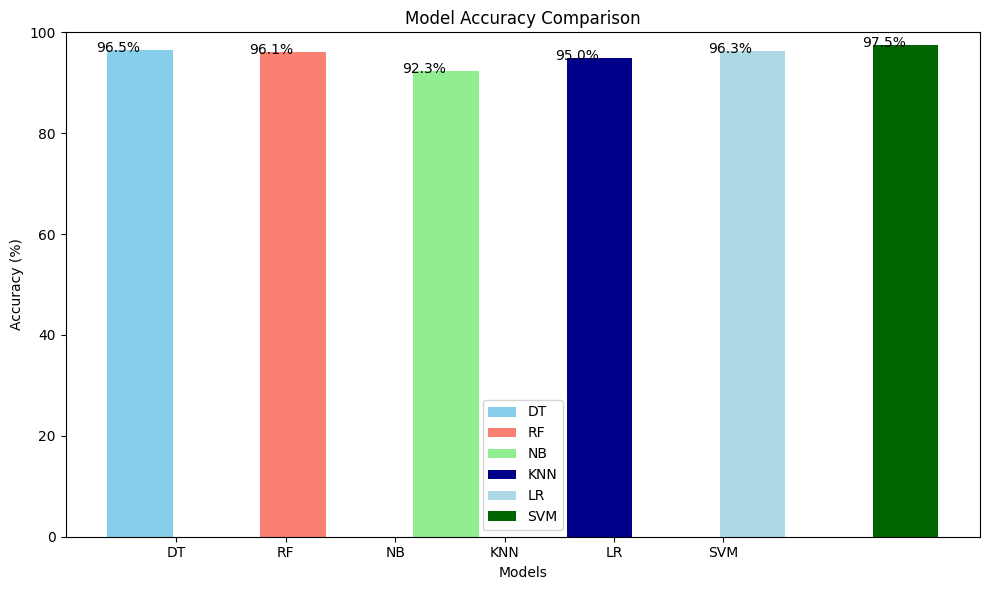

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracy values (replace these with your actual data)
model_names = ["DT", "RF", "NB", "KNN", "LR", "SVM"]
accuracy_values = [96.5, 96.1, 92.3, 95.0, 96.3, 97.5]

# Custom colors for each model
colors = ['skyblue', 'salmon', 'lightgreen', 'darkblue', 'lightblue', 'darkgreen']

# Define the width of each bar and the gap between bars
bar_width = 0.6  # Adjust the bar width as needed
gap = 0.4  # Adjust the gap between bars as needed

# Create a bar chart with reduced gap between bars
plt.figure(figsize=(10, 6))  # Adjust the figure size to reduce the gap
indices = np.arange(len(model_names))

for i, (name, acc) in enumerate(zip(model_names, accuracy_values)):
    plt.bar(indices[i] + gap * i, acc, color=colors[i], label=name, width=bar_width)

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)  # Set the y-axis range (0% to 100% for accuracy)

# Adjust the x-axis positions and labels
plt.xticks(indices + gap * (len(model_names) - 1) / 6, model_names)

# Display the accuracy values (with percentage format) on top of each bar
for i, acc in enumerate(accuracy_values):
    plt.text(indices[i] + gap * i, acc - 1, f'{acc}%', ha='right', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()